In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

In [3]:
def linear_resonator(f, f_0, Q_0, beta):
    num = (beta - 1 - (2j*Q_0*(f-f_0)/f_0))
    den = (beta + 1 + (2j*Q_0*(f-f_0)/f_0))
    return num/den

def linear_resonator_rotated(f, f_0, Q_0, beta, phi):
    lin_res = linear_resonator(f, f_0, Q_0, beta)
    eta_r = np.cos(phi)
    eta_i = 1j*np.sin(phi)
    retval = lin_res*(eta_r+eta_i)
    # see https://arxiv.org/pdf/1108.3117.pdf for why * eta_r
    return retval

def linear_resonator_rotated_offset(f, f_0, Q_0, beta, phi, dRe, dIm):
    rotated = linear_resonator_rotated(f, f_0, Q_0, beta, phi)
    Re = np.real(rotated) + dRe
    Im = np.imag(rotated) + dIm
    retval = Re + 1j*Im
    return retval

def plot_complex(x, data, fmt='k.', axs=None, label=None):
    if axs is None:
        f1 = plt.figure()
        ax1 = f1.subplots()
        f2 = plt.figure()
        ax2 = f2.subplots()
        f3 = plt.figure()
        ax3 = f3.subplots()
    else:
        ax1, ax2, ax3 = axs

    ax1.plot(x, np.abs(data), fmt, label=label)
    ax2.plot(x, np.unwrap(np.angle(data)), fmt, label=label)
    ax3.plot(np.real(data), np.imag(data), fmt, label=label)
    rough_fres_ind = np.argmin(np.abs(data))
    ax3.plot(np.real(data[rough_fres_ind]), np.imag(data[rough_fres_ind]), 'rx')

In [4]:
freqs = [7.5e9, 7.6e9]
smooth_f = np.linspace(freqs[0], freqs[-1], 10000)
params = [7.5765e9, 5000, 0.3]
theory = linear_resonator(smooth_f, *params)

0.9
0.9500000000000001
1.0
1.05
1.1


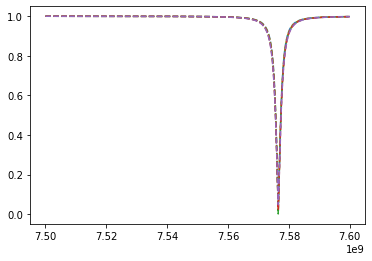

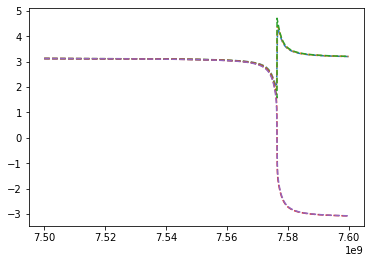

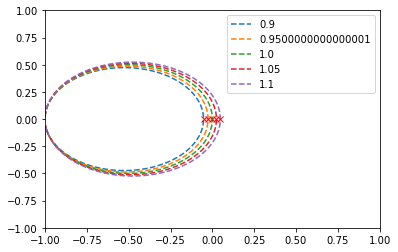

In [6]:
N = 5

f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
ax3.set_xlim(-1,1)
ax3.set_ylim(-1,1)
axs = (ax1, ax2, ax3)
fmts = [f'C{i}--' for i in range(N)]
params[2] = 0.01
#plot_complex(smooth_f, pp.linear_resonator(smooth_f, *params), fmt='k--', axs=axs)
for i,beta in enumerate(np.linspace(0.9, 1.1, N)):
    params[2] = beta
    print(beta)
    plot_complex(smooth_f, linear_resonator(smooth_f, *params), fmt=fmts[i], axs=axs,label=beta)
    
plt.legend()

0.9 168.22660167139748
0.925 167.5448912624688
0.9500000000000001 166.79572919185352
0.9750000000000001 166.0038546719984
1.0 165.7279133136023
1.0250000000000001 169.67360318087577
1.05 174.13139061612264
1.0750000000000002 178.54173493372377
1.1 182.88663766180315


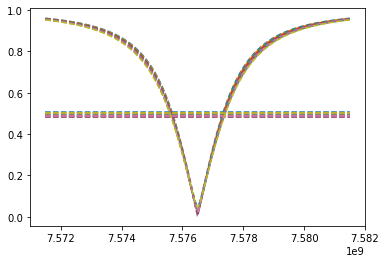

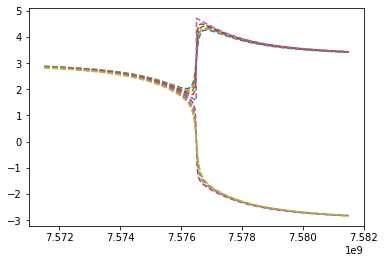

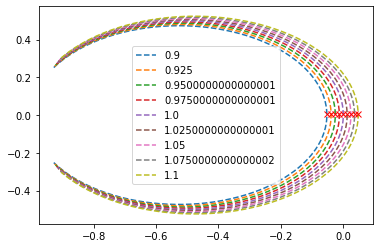

In [90]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
params[2] = 0.01
N = 9
fmts = [f'C{i}--' for i in range(N)]
fres = 7.5765e9
smooth_f = np.linspace(fres-5e6, fres+5e6,1000)
#plot_complex(smooth_f, pp.linear_resonator(smooth_f, *params), fmt='k--', axs=axs)
for i,beta in enumerate(np.linspace(0.9, 1.1, N)):
    params[2] = beta
    s11 = linear_resonator(smooth_f, *params)
    plot_complex(smooth_f, s11, fmt=fmts[i], axs=axs,label=beta)
    peak_ind = np.argmin(np.abs(smooth_f - 7.5765e9))
    width_data = peak_widths(-np.abs(s11), [peak_ind])
    width = width_data[0][0]
    ax1.plot(smooth_f, -np.ones_like(smooth_f)*width_data[1][0], fmts[i])
    print(beta, width)
    
plt.legend()

1.1532705002020363


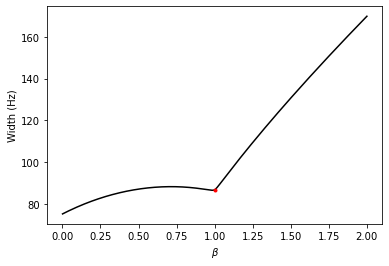

In [103]:
fres = 7.5765e9
r = 10e6
smooth_f = np.linspace(fres-r, fres+r,1000)
N=10000
widths = []
betas = np.linspace(0.001, 2, N)
for i,beta in enumerate(betas):
    params[2] = beta
    s11 = linear_resonator(smooth_f, *params)
    peak_ind = np.argmin(np.abs(smooth_f - fres))
    width_data = peak_widths(-np.abs(s11), [peak_ind])
    width = width_data[0][0]
    widths.append(width)
    
plt.plot(betas, widths, 'k')
plt.plot(betas[np.argmin(np.abs(betas-1))],widths[np.argmin(np.abs(betas-1))],'r.')
plt.ylabel("Width (Hz)")
plt.xlabel("$\\beta$")
print(widths[np.argmin(np.abs(betas-1))]/widths[0])

0.1
0.325
0.55
0.775
1.0


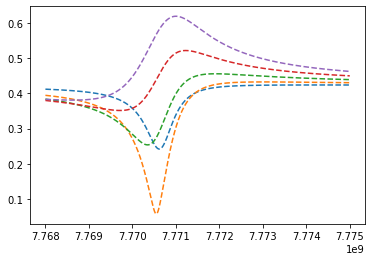

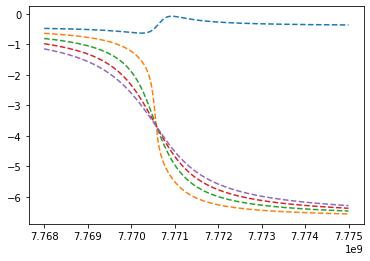

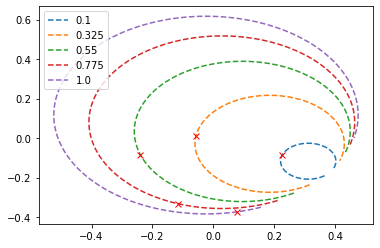

In [27]:
freqs = [7.768e9, 7.775e9]
smooth_f = np.linspace(freqs[0], freqs[-1], 10000)
params = [7.77067457e+09,  9.49367619e+03,  4.47319063e-01,  2.53466824e+00, -4.34831327e-01,  4.01723492e-01]
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
N=5
for i,beta in enumerate(np.linspace(0.1, 1, N)):
    params[2] = beta
    print(beta)
    plot_complex(smooth_f, linear_resonator_rotated_offset(smooth_f, *params), fmt=fmts[i], axs=axs,label=beta)
plt.legend()

0.0 1310.4006973309815
0.7853981633974483 1310.400697330981
1.5707963267948966 1310.400697330982
2.356194490192345 1310.4006973309824
3.141592653589793 1310.400697330982


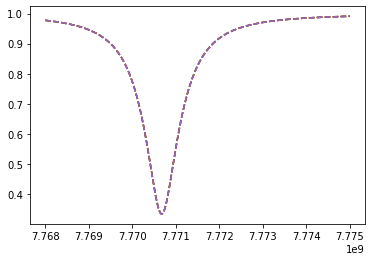

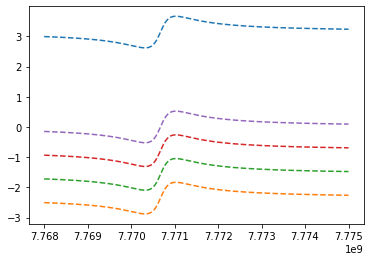

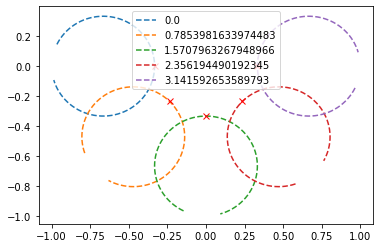

In [128]:
freqs = [7.768e9, 7.775e9]
smooth_f = np.linspace(freqs[0], freqs[-1], 10000)
params = [7.77067457e+09,  9.49367619e+03,  0.5,  0, 0,  0]
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
N=5
for i,phi in enumerate(np.linspace(0, np.pi, N)):
    params[3] = phi
    plot_complex(smooth_f, linear_resonator_rotated_offset(smooth_f, *params), fmt=fmts[i], axs=axs,label=phi)
    peak_ind = np.argmin(np.abs(linear_resonator_rotated_offset(smooth_f, *params)))
    width_data = peak_widths(-np.abs(linear_resonator_rotated_offset(smooth_f, *params)), [peak_ind])
    width = width_data[0][0]
    print(phi, width)
plt.legend()

0.1 1169.1762823193476
0.325 1208.9971662710632
0.55 1181.4616240742148
0.775 1147.3995865861962
1.0 1418.2211218675402


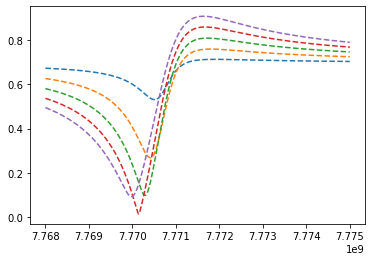

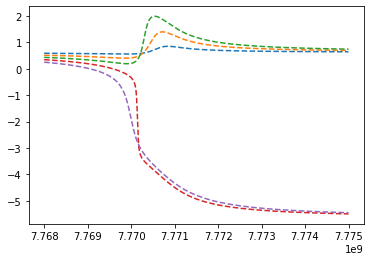

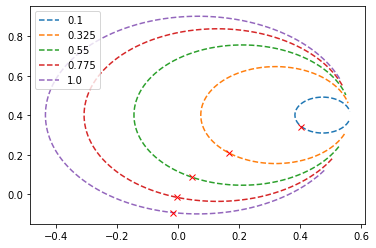

In [114]:
freqs = [7.768e9, 7.775e9]
smooth_f = np.linspace(freqs[0], freqs[-1], 10000)
params = [7.77067457e+09,  9.49367619e+03,  0.5,  np.pi, -4.34831327e-01,  4.01723492e-01]
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
N=5
for i,beta in enumerate(np.linspace(0.1,1, N)):
    params[2] = beta
    plot_complex(smooth_f, linear_resonator_rotated_offset(smooth_f, *params), fmt=fmts[i], axs=axs,label=beta)
    peak_ind = np.argmin(np.abs(linear_resonator_rotated_offset(smooth_f, *params)))
    width_data = peak_widths(-np.abs(linear_resonator_rotated_offset(smooth_f, *params)), [peak_ind])
    width = width_data[0][0]
    print(beta, width)
plt.legend()